In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import numpy as np
import pandas as pd
from joblib import dump, load
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [8]:
dataset  = pd.read_csv("./data/labeled_dataset1.csv")

for column in dataset["Class"].unique():
    print(column, len(dataset[dataset["Class"] == column]))

#walk    
walk_set = dataset[dataset["Class"] == "walk"]
#rest
stand_set =  dataset[dataset["Class"] == "standing"].sample(n=7000)
sitting_set =  dataset[dataset["Class"] == "sitting"].sample(n=7000)
lying_set =  dataset[dataset["Class"] == "lying"].sample(n=7000)
rest_set = pd.concat([stand_set, sitting_set, lying_set], axis=0, ignore_index=True).sample(n=5000)
#eat and drink
eat_set = dataset[dataset["Class"] == "eat"].sample(n=4000)
#groom
scratching_set = dataset[dataset["Class"] == "scratching"]
groom_set = dataset[dataset["Class"] == "groom"].sample(n=4000)
#littering
littering_set = dataset[dataset["Class"] == "littering"]

balanced_dataset = pd.concat([walk_set, rest_set, eat_set, scratching_set, groom_set], axis=0, ignore_index=True)
balanced_dataset.loc[balanced_dataset['Class'].isin(['sitting', 'standing', 'lying']), 'Class'] = "rest"
balanced_dataset.loc[balanced_dataset['Class'].isin(['scratching']), 'Class'] = "groom"
balanced_dataset.loc[balanced_dataset['Class'].isin(['walk']), 'Class'] = "active"
# balanced_dataset.loc[balanced_dataset['Class'].isin(['eat', 'groom']), 'Class'] = "maintenance"
# balanced_dataset = balanced_dataset[["X_Mean", "Y_Mean", "Z_Mean", "X_sd", 'Y_sd', 'Z_sd', 'X_Min', 'X_Max', 'Y_Min', 'Y_Max', 'Z_Min', 'Z_Max', "Class"]]
balanced_dataset.drop(columns=['X_Sum', 'Y_Sum', 'Z_Sum', 'VM_Sum', 'ODBA15_Mean', 'ODBA30_Mean', 'ODBA45_Mean', 'ODBA60_Mean', "ODBA90_Mean",
                            # 'X_Mean','X_Min','X_Max', 'Y_Mean','Y_Min','Y_Max', 'Z_Mean','Z_Min','Z_Max', 'VM_Mean', 'VM_Min', 'VM_Max'
                            ], inplace=True)
display(balanced_dataset.columns, len(balanced_dataset))
for column in balanced_dataset["Class"].unique():
    print(column, len(balanced_dataset[balanced_dataset["Class"] == column]))


active 1151
standing 7937
walk 3809
sitting 35752
lying 56611
groom 11772
scratching 484
eat 6862
littering 560


Index(['Timestamp', 'X_Mean', 'X_Min', 'X_Max', 'X_sd', 'X_Skew', 'X_Kurt',
       'Y_Mean', 'Y_Min', 'Y_Max', 'Y_sd', 'Y_Skew', 'Y_Kurt', 'Z_Mean',
       'Z_Min', 'Z_Max', 'Z_sd', 'Z_Skew', 'Z_Kurt', 'VM_Mean', 'VM_Min',
       'VM_Max', 'VM_sd', 'VM_Skew', 'VM_Kurt', 'Cor_XY', 'Cor_XZ', 'Cor_YZ',
       'Class'],
      dtype='object')

14293

active 3809
rest 5000
eat 2500
groom 2984


**random forest**

In [6]:
X = balanced_dataset.iloc[:,1:-1]
y = balanced_dataset["Class"]  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
BA_RF_model = RandomForestClassifier()
BA_RF_model.fit(X_train, y_train)
dump(BA_RF_model, "./RF_model.model")

['./RF_model.model']

In [48]:
y_pred = BA_RF_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      active       0.77      0.53      0.63       386
 maintenance       0.85      0.94      0.89      1410
        rest       0.81      0.77      0.79       520

    accuracy                           0.83      2316
   macro avg       0.81      0.75      0.77      2316
weighted avg       0.83      0.83      0.83      2316



**neuron netwrok**

In [56]:
X = balanced_dataset.iloc[:,1:-1]
y = balanced_dataset["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
BA_nn_model = MLPClassifier(max_iter=400)
BA_nn_model.fit(X_train, y_train)
dump(BA_nn_model, "./nn_model.model")

['./nn_model.model']

In [59]:
y_pred = BA_nn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      active       0.84      0.61      0.70       377
 maintenance       0.76      0.95      0.85       645
        rest       0.87      0.78      0.82       508

    accuracy                           0.81      1530
   macro avg       0.82      0.78      0.79      1530
weighted avg       0.82      0.81      0.80      1530



**check data**

In [5]:
model:RandomForestClassifier = load("./RF_model.model")

valid = pd.read_csv("./data/valid.csv")
valid.loc[valid['Class'].isin(['drink', 'eat']), 'Class'] = "eat"
valid.loc[valid['Class'].isin(['sleep', 'rest']), 'Class'] = "rest"
valid.loc[valid['Class'].isin(['walk']), 'Class'] = "active"
# valid.loc[valid['Class'].isin(['eat','groom']), 'Class'] = "maintenance"

valid_X = valid.iloc[:,0:-1]
valid_y = valid["Class"]  
pred_y = model.predict(valid_X)
print(classification_report(valid_y, pred_y))

              precision    recall  f1-score   support

      active       0.00      0.00      0.00         0
 maintenance       1.00      0.84      0.91        25

    accuracy                           0.84        25
   macro avg       0.50      0.42      0.46        25
weighted avg       1.00      0.84      0.91        25



d:\anaconda\envs\cat-collar\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda\envs\cat-collar\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda\envs\cat-collar\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


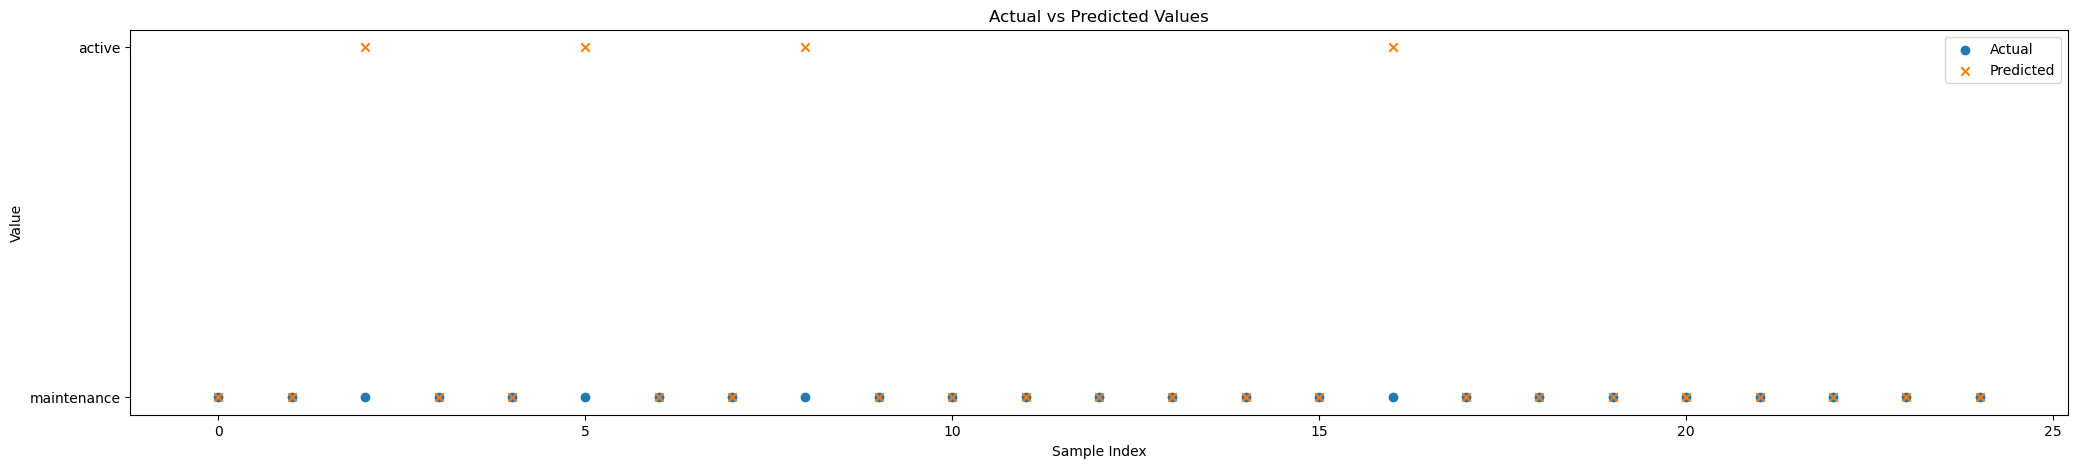

In [7]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(25, 5))
plt.scatter(range(len(valid_y)), valid_y, label='Actual', marker='o')
plt.scatter(range(len(pred_y)), pred_y, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()